In [10]:
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv("Dataset/breast+normal.csv")
df = shuffle(df, random_state=42).reset_index(drop=True)

display(df.head(5))

,cancer_type,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,breast,HER,10.497409,7.569389,5.437551,7.411912,3.190743,7.305773,5.304184,4.762072,...,12.607171,12.062943,13.933579,13.763558,7.275929,5.632454,5.802355,2.829433,3.432319,3.178773
1,breast,luminal_B,9.807807,7.741954,5.717029,6.818109,2.853006,7.927259,5.510002,4.403924,...,12.323205,11.796000,14.035521,13.895761,8.340726,6.379170,7.216870,2.885865,3.532147,3.362385
2,breast,luminal_A,9.825845,7.330690,6.498562,7.676991,3.033561,7.008091,5.138981,4.517688,...,12.340412,11.901605,14.192789,13.978434,8.266713,6.482562,6.996929,2.915768,3.457026,3.163205
3,breast,tumoral_non_BLC,10.427056,6.879706,6.571095,8.134821,3.700005,6.724762,5.775130,4.770331,...,11.734314,11.214682,13.608293,13.458257,3.943266,3.709037,3.503754,3.459127,3.859622,3.722744
4,normal,normal,7.890408,3.836424,6.111609,6.445640,2.143196,7.755478,6.458044,3.871710,...,11.014915,10.796945,13.106769,12.675739,2.585980,2.466891,2.098902,2.200971,2.291370,2.381692


In [11]:
def preprocessing(df):
    
    # Drop type Columns
    if "type" in df.columns:
        df = df.drop(columns="type")

    # Convert label to binary type:
    if 'cancer_type' in df.columns and not df['cancer_type'].isin([0, 1]).all():
        df['cancer_type'] = df['cancer_type'].map({'breast': 1, 'normal': 0})
    
    # Get X,y
    target = 'cancer_type'
    X = df.drop(columns=target)
    y = df[target]
    
    return X,y 

X,y = preprocessing(df)
display(X.head(5))
display(y.head(5))

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,10.497409,7.569389,5.437551,7.411912,3.190743,7.305773,5.304184,4.762072,7.589268,3.971515,...,12.607171,12.062943,13.933579,13.763558,7.275929,5.632454,5.802355,2.829433,3.432319,3.178773
1,9.807807,7.741954,5.717029,6.818109,2.853006,7.927259,5.510002,4.403924,9.353458,3.360264,...,12.323205,11.796000,14.035521,13.895761,8.340726,6.379170,7.216870,2.885865,3.532147,3.362385
2,9.825845,7.330690,6.498562,7.676991,3.033561,7.008091,5.138981,4.517688,8.178673,5.459552,...,12.340412,11.901605,14.192789,13.978434,8.266713,6.482562,6.996929,2.915768,3.457026,3.163205
3,10.427056,6.879706,6.571095,8.134821,3.700005,6.724762,5.775130,4.770331,5.381377,3.818877,...,11.734314,11.214682,13.608293,13.458257,3.943266,3.709037,3.503754,3.459127,3.859622,3.722744
4,7.890408,3.836424,6.111609,6.445640,2.143196,7.755478,6.458044,3.871710,6.727471,3.822340,...,11.014915,10.796945,13.106769,12.675739,2.585980,2.466891,2.098902,2.200971,2.291370,2.381692


0    1
1    1
2    1
3    1
4    0
Name: cancer_type, dtype: int64

In [14]:
# Method 1: Variance Threshold (Assume Features with higher variance => better)
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

threshold = 0.001
selector = VarianceThreshold(threshold=threshold)
X_var = selector.fit_transform(X)

selected_feature_indices = selector.get_support(indices=True)
X_var = X.columns[selected_feature_indices]
print(f"Number of selected features: {len(X_var)}")
print(f"Selected features: {X_var}")

Number of selected features: 54675
Selected features: Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54675)


In [12]:
# Method 2: Unvariate feature selection method (Based on their relation with output)
# ANOVA f-statistics

from sklearn.feature_selection import SelectKBest, f_classif

# Select top 1000 features based on ANOVA F-statistic
k_best_selector = SelectKBest(score_func=f_classif, k=500)
X_anova = k_best_selector.fit_transform(X, y)

# Get selected feature names
X_anova = X.columns[k_best_selector.get_support()]

print(f"Selected features: {X_anova}")

Selected features: Index(['1552789_at', '1552790_a_at', '1553243_at', '1554547_at', '1555241_at',
       '1555243_x_at', '1558662_s_at', '1559000_at', '1559067_a_at',
       '1559949_at',
       ...
       '244730_x_at', '244779_at', '244880_at', '32625_at', '36829_at',
       '37892_at', '38037_at', '45288_at', '48031_r_at', '53991_at'],
      dtype='object', length=500)


In [13]:
# Method 3: Mutual Information methnod (Non-linear relationship between predictors and targets)

from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 100 features based on Mutual Information
mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=500)
X_mut = mutual_info_selector.fit_transform(X, y) 

# Get selected feature names
X_mut = X.columns[mutual_info_selector.get_support()]

print(f"Selected features: {X_mut}")


Selected features: Index(['1552281_at', '1553243_at', '1554485_s_at', '1554712_a_at',
       '1554715_at', '1554943_at', '1555236_a_at', '1555311_at', '1556165_at',
       '1556533_at',
       ...
       '244779_at', '244880_at', '32625_at', '36742_at', '36829_at',
       '37892_at', '38037_at', '45288_at', '48031_r_at', '53991_at'],
      dtype='object', length=500)


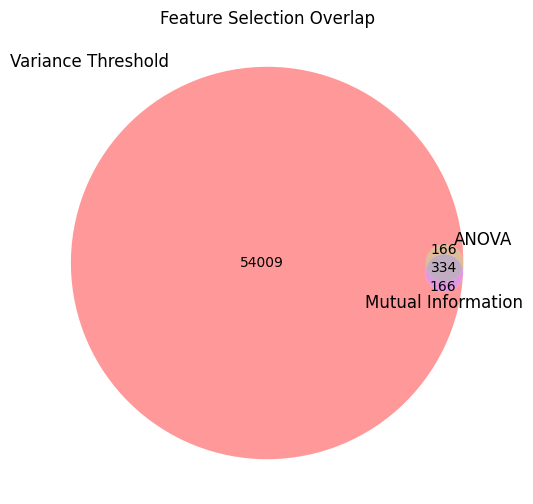

In [15]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3  

# Convert numpy arrays to flattened lists for compatibility
variance_features = set(X_var.ravel())
anova_features = set(X_anova.ravel())
mutual_info_features = set(X_mut.ravel())

# Create a Venn diagram to visualize the overlap
plt.figure(figsize=(8, 6))
venn_diagram = venn3(
    subsets=(
        len(variance_features - anova_features - mutual_info_features),  # Only Variance
        len(anova_features - variance_features - mutual_info_features),  # Only ANOVA
        len(variance_features & anova_features - mutual_info_features),  # Variance & ANOVA
        len(mutual_info_features - variance_features - anova_features),  # Only Mutual Info
        len(variance_features & mutual_info_features - anova_features),  # Variance & Mutual Info
        len(anova_features & mutual_info_features - variance_features),  # ANOVA & Mutual Info
        len(variance_features & anova_features & mutual_info_features),  # All 3 Methods
    ),
    set_labels=("Variance Threshold", "ANOVA", "Mutual Information"),
)
plt.title("Feature Selection Overlap")
plt.show()


In [17]:
combined_features = set(X_anova).union(set(X_mut))  # Combine both feature sets
X_reduce = X[list(combined_features)]  # Subset the data to include combined features

X = X_reduce

In [18]:
# Model train: Logistic Regression, L1 Regularization, 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np

# Define Training Pipeline
pipeline = Pipeline([
    ('classifier', LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state=42))
])

# Define Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
accuracy_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Perform K-Fold Cross-Validation
fold = 1
for train_index, test_index in skf.split(X, y):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Append scores
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    
    fold += 1

In [19]:
# Final Train accuracy

# Print average metrics across folds
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}")
print(f"Mean Recall: {np.mean(recall_scores):.2f} ± {np.std(recall_scores):.2f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}")
print(f"Mean ROC-AUC: {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}")


Cross-Validation Results:
Mean Accuracy: 1.00 ± 0.00
Mean Recall: 1.00 ± 0.00
Mean F1 Score: 1.00 ± 0.00
Mean ROC-AUC: 1.00 ± 0.00


In [37]:
import pandas as pd
from sklearn.utils import shuffle

# Load and shuffle the dataset
test_breast = pd.read_csv("Dataset/breast_test.csv")
X_test, y_test = preprocessing(test_breast)
X_test = X_test[X.columns]
display(X_test, y_test)

,242678_at,227948_at,201834_at,209815_at,217428_s_at,209513_s_at,223595_at,224215_s_at,225655_at,219263_at,...,201909_at,204160_s_at,219093_at,225926_at,205392_s_at,210106_at,230111_at,228113_at,213668_s_at,227614_at
0,5.190508,8.332482,8.655049,9.681880,4.966508,10.175490,6.703235,8.384564,6.525912,8.429018,...,11.836182,10.396651,9.310741,9.850018,6.326118,7.582812,6.192104,8.011197,7.257617,6.240150
1,5.695761,8.058218,9.050757,11.508228,3.458980,10.091185,5.827423,6.842021,6.981471,6.327270,...,12.366826,9.448791,7.340447,8.750857,6.171723,7.881491,6.033950,10.416496,7.979375,7.297235
2,2.996026,6.144753,6.769509,4.156503,9.658203,7.105527,3.375817,4.149410,7.919192,2.986293,...,4.204746,5.292842,4.297850,4.838880,4.837380,5.112886,3.751426,4.016131,9.027707,3.537201
3,4.401512,8.725658,6.798113,6.207070,10.541665,8.295869,5.358655,5.765532,8.752584,5.556919,...,5.139869,5.617497,4.784544,7.241851,5.241511,5.602512,4.331306,3.411916,9.314547,4.258397
4,4.532268,8.038556,7.021634,6.368293,5.439304,7.681425,4.413864,3.606435,8.793189,6.431220,...,5.047751,7.059248,4.394983,6.715399,4.765230,5.782860,4.492294,3.634559,9.246056,3.633947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,6.617625,9.068007,8.586153,8.588661,6.172460,10.083318,6.451360,10.810767,8.278590,10.145444,...,12.698050,8.492636,8.338218,8.588019,9.209438,7.605945,6.493044,6.493473,8.733546,7.289021
78,6.149031,9.429461,8.158472,9.265813,5.274562,11.647088,8.475051,7.819974,6.716141,11.056577,...,12.458833,9.866550,8.777792,9.523264,8.692177,8.200882,6.544694,6.576947,7.369543,6.414773
79,2.739932,4.427942,3.228269,3.251566,2.294257,4.977920,2.866711,3.049210,4.834325,4.377829,...,5.133661,3.496560,2.875355,2.631356,4.567131,5.275819,4.045671,3.015857,3.070015,3.959357
80,3.103914,4.409763,3.163168,2.777354,2.549520,3.752235,2.934104,3.100647,4.553086,3.045396,...,5.802846,2.724759,3.549529,2.711050,4.304114,6.014329,4.009479,3.091915,3.081708,3.749645


0     0
1     0
2     1
3     1
4     1
     ..
77    0
78    0
79    0
80    0
81    0
Name: cancer_type, Length: 82, dtype: int64

In [39]:
# Predict using the final trained model
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print results
print("\nFinal Model Evaluation on Test Dataset:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Final Model Evaluation on Test Dataset:
Accuracy: 0.98
Recall: 1.00
F1 Score: 0.97
ROC-AUC: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.94      1.00      0.97        30

    accuracy                           0.98        82
   macro avg       0.97      0.98      0.97        82
weighted avg       0.98      0.98      0.98        82



In [40]:
import pandas as pd

# Create the report dataframe
report_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred,
    'Probability (Bladder)': y_pred_prob
})

# Save the report to the Dataset directory
output_path = "Dataset/test_set_prediction_report.csv"
report_df.to_csv(output_path, index=False)

print(f"Prediction report saved to {output_path}")


Prediction report saved to Dataset/test_set_prediction_report.csv


In [41]:
import pandas as pd
import numpy as np

# Predict probabilities for the test dataset
y_pred = pipeline.predict(X_test)  # Predicted class (0 or 1)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability for class 1

# Extract coefficients and feature names
coefficients = pipeline.named_steps['classifier'].coef_[0]
feature_names = X.columns

# For each sample predicted as bladder cancer (class 1)
for i, (pred, prob) in enumerate(zip(y_pred, y_pred_prob)):
    if pred == 1:  # Only consider predictions for class 1 (bladder cancer)
        sample_features = X_test.iloc[i, :]  # Feature values for the sample
        contributions = sample_features.values * coefficients  # Calculate feature contributions
        
        # Create a DataFrame for contributions
        contribution_df = pd.DataFrame({
            'Feature': feature_names,
            'Contribution': contributions
        }).sort_values(by='Contribution', ascending=False)  # Sort by contribution
        
        # Print details for the sample
        print(f"\nSample {i}: Predicted Probability (Bladder): {prob:.4f}")
        print("Top Contributing Genes:")
        print(contribution_df.head(10))  # Display top 10 genes for this sample



Sample 2: Predicted Probability (Bladder): 1.0000
Top Contributing Genes:
         Feature  Contribution
132     37892_at      2.220569
55     225681_at      2.065459
8      225655_at      1.927376
651    204320_at      1.777389
4    217428_s_at      1.482070
104  209604_s_at      1.253340
88     204653_at      1.006142
648  209602_s_at      0.986411
93   203878_s_at      0.850114
664  213668_s_at      0.822426

Sample 3: Predicted Probability (Bladder): 0.9999
Top Contributing Genes:
         Feature  Contribution
132     37892_at      2.274459
8      225655_at      2.130207
55     225681_at      2.057089
651    204320_at      1.787338
4    217428_s_at      1.617639
88     204653_at      1.140318
104  209604_s_at      0.984889
93   203878_s_at      0.887036
664  213668_s_at      0.848558
38   205941_s_at      0.829021

Sample 4: Predicted Probability (Bladder): 0.9997
Top Contributing Genes:
         Feature  Contribution
8      225655_at      2.140090
55     225681_at      1.755013


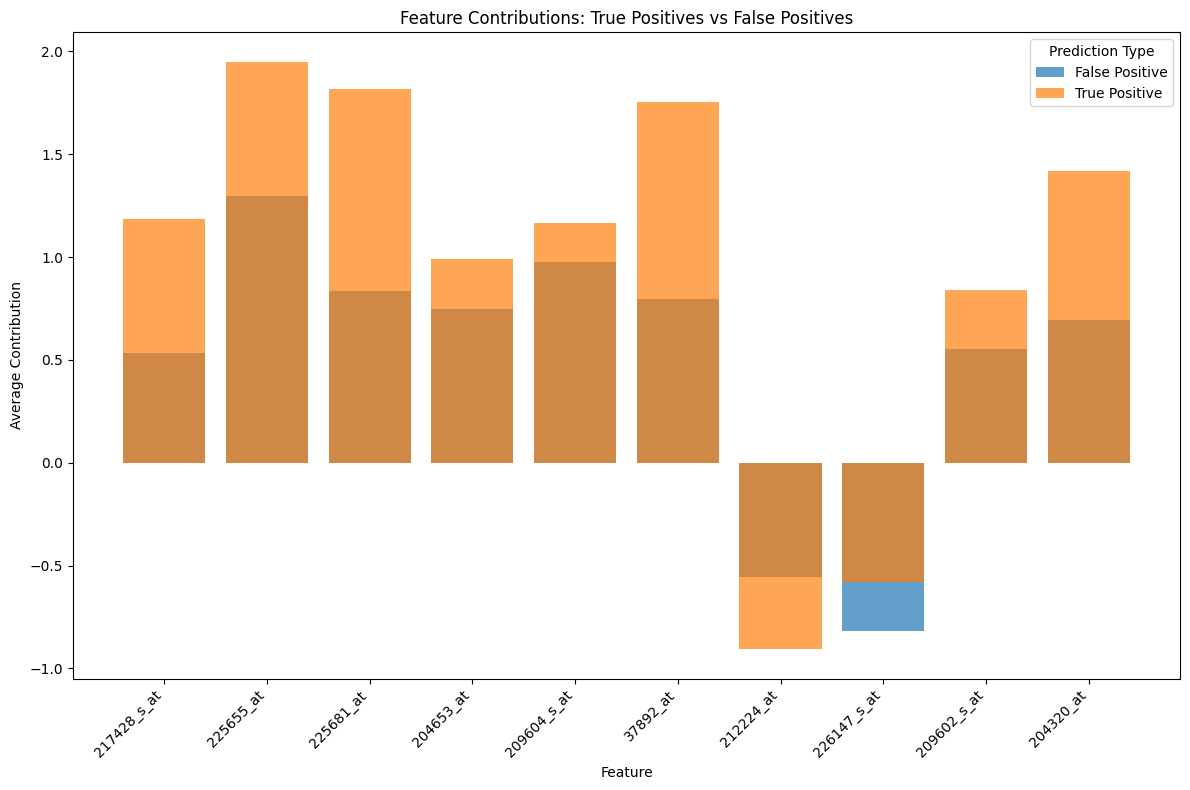

In [42]:
# Visualize the difference between gene pattern of TP and FP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test dataset
y_pred = pipeline.predict(X_test)  # Predicted class (0 or 1)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability for class 1

# Extract coefficients and feature names
coefficients = pipeline.named_steps['classifier'].coef_[0]
feature_names = X.columns

# Identify TP and FP indices
TP_indices = np.where((y_test == 1) & (y_pred == 1))[0]  # True Positives
FP_indices = np.where((y_test == 0) & (y_pred == 1))[0]  # False Positives

# Function to calculate mean contributions
def calculate_mean_contributions(indices, X, coefficients, feature_names):
    contributions_list = []
    for i in indices:
        sample_features = X.iloc[i, :]  # Feature values for the sample
        contributions = sample_features.values * coefficients  # Feature contributions
        contributions_list.append(contributions)
    contributions_array = np.array(contributions_list)
    mean_contributions = contributions_array.mean(axis=0)  # Average contributions
    return pd.DataFrame({'Feature': feature_names, 'Contribution': mean_contributions})

# Calculate average contributions for TP and FP
TP_contributions = calculate_mean_contributions(TP_indices, X_test, coefficients, feature_names)
FP_contributions = calculate_mean_contributions(FP_indices, X_test, coefficients, feature_names)

# Combine data for plotting
TP_contributions['Type'] = 'True Positive'
FP_contributions['Type'] = 'False Positive'
combined_contributions = pd.concat([TP_contributions, FP_contributions])

# Select top features by absolute contribution
top_features = combined_contributions.groupby('Feature')['Contribution'].apply(lambda x: x.abs().mean()).nlargest(10).index
plot_data = combined_contributions[combined_contributions['Feature'].isin(top_features)]

# Plot
plt.figure(figsize=(12, 8))
for label, group in plot_data.groupby('Type'):
    plt.bar(group['Feature'], group['Contribution'], label=label, alpha=0.7)

plt.title("Feature Contributions: True Positives vs False Positives")
plt.ylabel("Average Contribution")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Prediction Type")
plt.tight_layout()
plt.show()


In [44]:
# Save model

import joblib
joblib.dump(pipeline, 'breast.joblib')

['breast.joblib']